# Predicting the latest trends in machine learning with Machine Learning

## 1. Loading the NIPS papers

In [24]:
# Importing modules
import pandas as pd

# Read datasets/papers.csv into papers
papers =pd.read_csv('papers.csv')

# Print out the first rows of papers
print(papers.head(10))
print(papers.ndim)

     id  year                                              title event_type  \
0     1  1987  Self-Organization of Associative Database and ...        NaN   
1    10  1987  A Mean Field Theory of Layer IV of Visual Cort...        NaN   
2   100  1988  Storing Covariance by the Associative Long-Ter...        NaN   
3  1000  1994  Bayesian Query Construction for Neural Network...        NaN   
4  1001  1994  Neural Network Ensembles, Cross Validation, an...        NaN   
5  1002  1994  Using a neural net to instantiate a deformable...        NaN   
6  1003  1994           Plasticity-Mediated Competitive Learning        NaN   
7  1004  1994  ICEG Morphology Classification using an Analog...        NaN   
8  1005  1994  Real-Time Control of a Tokamak Plasma Using Ne...        NaN   
9  1006  1994  Pulsestream Synapses with Non-Volatile Analogu...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Ab

## 2. Preparing the data for analysis

In [25]:
# Remove the columns that are not needed for prediction
papers = papers.drop(['id',  'event_type', 'pdf_name'], axis=1)
# Print out the first 10 rows of papers
papers.head(10)

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
5,1994,Using a neural net to instantiate a deformable...,Abstract Missing,U sing a neural net to instantiate a\ndeformab...
6,1994,Plasticity-Mediated Competitive Learning,Abstract Missing,Plasticity-Mediated Competitive Learning\n\nTe...
7,1994,ICEG Morphology Classification using an Analog...,Abstract Missing,ICEG Morphology Classification using an\nAnalo...
8,1994,Real-Time Control of a Tokamak Plasma Using Ne...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...
9,1994,Pulsestream Synapses with Non-Volatile Analogu...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...


## 3.Plotting how machine learning has evolved over time

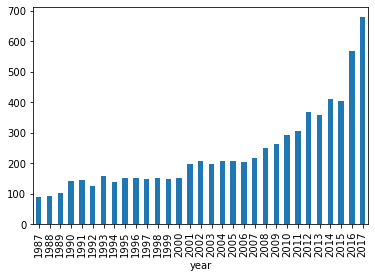

In [26]:
# Group the papers by year
groups=papers.groupby("year")
counts=groups.size()

# Determine the size of each group
import matplotlib.pyplot
%matplotlib inline
counts.plot(kind='bar');

<AxesSubplot:ylabel='None'>

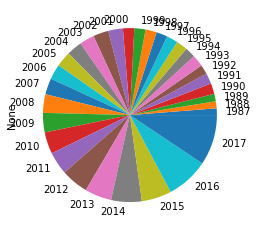

In [32]:
counts.plot(kind='pie')

<AxesSubplot:ylabel='Frequency'>

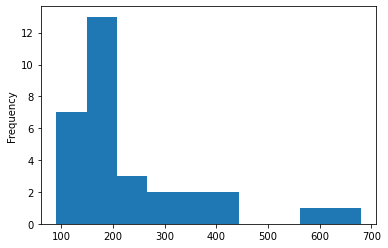

In [33]:
counts.plot(kind='hist')

<AxesSubplot:>

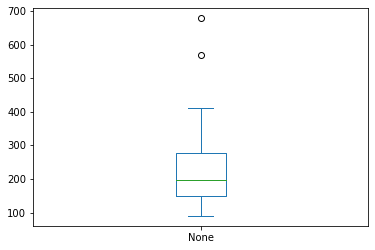

In [35]:
counts.plot(kind='box')

## 4. Preprocessing the text data

In [36]:
# Load the regular expression library
import re

# Print the titles of the first 5 rows 
print(papers['title'].head())

# Remove punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

# Print the processed titles of the first rows 
papers['title_processed'].head()

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object

In [38]:
pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-win_amd64.whl size=160945 sha256=76309a5340f42615a9e391bbafa665f865ea8a8db5d93a7c3c77cfdd4213680f
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\f9\7a\dd\06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


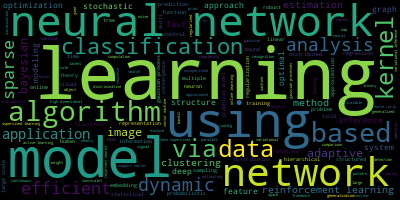

In [39]:
#5. A word cloud to visualize the preprocessed text data
# Import the wordcloud library

import wordcloud 

# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object
wordcloud = wordcloud.WordCloud()
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## 6. Prepare the text for LDA analysis

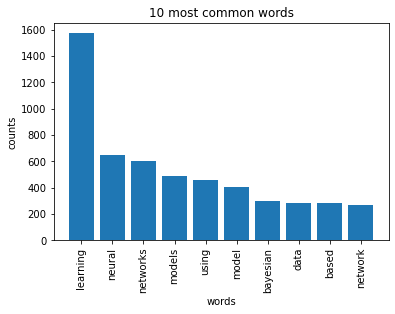

In [40]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer =CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)


In [41]:
#7. Analysing trends with LDA
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        


## Topics extracted via LDA

In [42]:
# Tweak the two parameters below 
number_topics = 14
number_words = 5

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
networks neural inference time recurrent

Topic #1:
learning deep networks supervised semi

Topic #2:
information approach neural model classification

Topic #3:
convergence spike neural margin learning

Topic #4:
learning clustering robust spectral regularization

Topic #5:
using structure learning model hidden

Topic #6:
control risk minimization modeling optimization

Topic #7:
models gaussian learning process inference

Topic #8:
learning random estimation functions function

Topic #9:
network neural learning model feature

Topic #10:
recognition analysis component field visual

Topic #11:
gradient programming approximate descent dynamic

Topic #12:
learning reinforcement multi based stochastic

Topic #13:
vector data machines bayesian support
